In [19]:
import pickle, glob, sys, os

import numpy as np
import matplotlib.pyplot as plt

#from utils import *
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import mixture
from scipy.ndimage.filters import median_filter, gaussian_filter
from scipy.stats import multivariate_normal, beta, gamma, norm, skewnorm, skew, kurtosis, t

# Dataset v5
FB or LK?

In [20]:
# 0.7410975609756099 316.22776601683796 1 0.9
# [[405   4   1   0], [  2 407   1   0], [  5   0 405   0], [  0 130  21 259]]
# 0.7360975609756097 0.1 2 0.8085365853658537
# [[326  84   0   0], [ 52 333  25   0], [  0   0 410   0], [  0 136  17 257]]
# 0.7158536585365853 3.1622776601683795 3 0.7908536585365854
# [[278 130   0   2], [  1 384  24   1], [  0   0 375  35], [  0 136  14 260]]
# 0.7`252439024390245 3.1622776601683795 4 0.7939024390243903
# [[261 142   6   1], [ 10 375  24   1], [  0   0 408   2], [  0 137  15 258]]
# 0.7212195121951219 0.0031622776601683794 5 0.801219512195122
# [[261 142   7   0], [  0 384  21   5], [  0   0 410   0], [  0 137  14 259]]
x_3_ = np.array([0.9, 0.8085365853658537, 0.7908536585365854, 0.7939024390243903, 0.801219512195122])[..., np.newaxis]

# 0.761219512195122 100.0 1 0.8945121951219512
# [[408   1   1   0], [ 19 391   0   0], [  0   0 410   0], [  0 135  17 258]]
# 0.7449999999999999 0.0031622776601683794 2 0.8402439024390244
# [[304 103   3   0], [  0 405   5   0], [  0   0 410   0], [  0 135  16 259]]
# 0.7186585365853659 0.1 3 0.8219512195121951
# [[305 100   0   5], [  0 408   2   0], [  0   0 375  35], [  0 136  14 260]]
# 0.7210975609756097 10.0 4 0.8109756097560976
# [[261 147   2   0], [  2 400   7   1], [  0   0 410   0], [  0 137  14 259]]
# 0.7284146341463414 31.622776601683793 5 0.8170731707317073
# [[268 138   4   0], [  0 403   1   6], [  0   0 410   0], [  0 137  14 259]]
x_4_ = np.array([0.89451219512195, 0.84024390243902, 0.82195121951219, 0.81097560975609, 0.81707317073170])[..., np.newaxis]

# 0.7298780487804878 316.22776601683796 1 0.8798780487804878
# [[408   1   1   0], [ 23 387   0   0], [ 20   0 390   0], [  0 134  18 258]]
# 0.7096341463414635 0.31622776601683794 2 0.7804878048780488
# [[313  86  10   1], [ 88 299  23   0], [  0   0 410   0], [  1 135  16 258]]
# 0.6925609756097562 3.1622776601683795 3 0.7701219512195122
# [[270  57  62  21], [ 40 353  10   7], [  0   0 381  29], [  0 136  15 259]]
# 0.6709756097560976 0.0031622776601683794 4 0.7786585365853659
# [[267  96  46   1], [ 52 345   8   5], [  2   0 408   0], [  0 138  15 257]]
# 0.646829268292683 0.31622776601683794 5 0.8109756097560976
# [[291  78  40   1], [ 19 383   1   7], [ 12   0 398   0], [  0 138  14 258]]
x_2_ = np.array([0.87987804878048, 0.78048780487804, 0.77012195121951, 0.77865853658536, 0.81097560975609])[..., np.newaxis]

# 0.6417073170731706 0.001 1 0.6573170731707317
# [[190  18 202   0], [  0 410   0   0], [195   0 215   0], [  0 134  13 263]]
# 0.63 0.31622776601683794 2 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  21 259]]
# 0.6526829268292683 0.03162277660168379 3 0.8115853658536586
# [[261 149   0   0], [  0 410   0   0], [  0   0 401   9], [  0 136  15 259]]
# 0.6437804878048781 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  1   0 409   0], [  0 136  15 259]]
# 0.6240243902439023 0.0031622776601683794 5 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  2   0 408   0], [  0 136  14 260]]
x_1_ = np.array([0.65731707317073, 0.81707317073170, 0.81158536585365, 0.81646341463414, 0.81646341463414])[..., np.newaxis]

# Ait Temp, Dew Point, pressure, humidity, elevation, azimuth, CSI, GSI, pyranometer, wind angle, wind magnitude
# Preassure, CSI, pyranometer
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1) * 100.
y_ = np.array([0.9, 0.89451219512195, 0.87987804878048, 0.81707317073170]) * 100.

# [[405   4   1   0], [  2 407   1   0], [  5   0 405   0], [  0 130  21 259]]
C_ = np.array([[405, 4, 1, 0], [2, 407, 1, 0], [5, 0, 405, 0], [0, 130, 21, 259]])

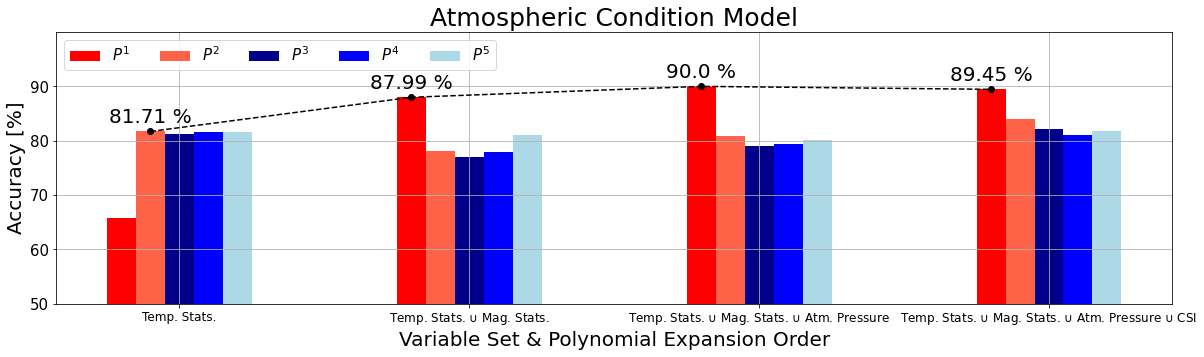

In [21]:
width     = 0.2
model_    = np.arange(0, 8, 2)
y_max_    = np.max(x_, axis = 0)
y_argmax_ = np.argmax(x_, axis = 0)
z_        = [-0.2, 1.6, 3.6, 5.6]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'$P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'$P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'$P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'$P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'$P^5$', color = 'lightblue')

plt.plot(z_, y_max_, '--o', color = 'black')

for x, y, y_max in zip(z_, y_, y_max_):
    #plt.text(x, y + 1, r'{} %'.format(np.around(y, decimals = 2)), ha = "center", fontsize = 15)
    plt.text(x, y_max + 1.5, r'{} %'.format(np.around(y_max, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper left', ncol = 7, fontsize = 15)
plt.ylim((50, 100))
plt.xticks(np.arange(0., 8., 2.), [r'Temp. Stats.', r'Temp. Stats. $\cup$ Mag. Stats.', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ Atm. Pressure', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ Atm. Pressure $\cup$ CSI'], fontsize = 12)
plt.yticks(np.arange(50., 100, 10.), fontsize = 15)

plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'Accuracy [%]', fontsize = 20)
plt.title(r'Atmospheric Condition Model', fontsize = 25)
plt.grid()
plt.show()

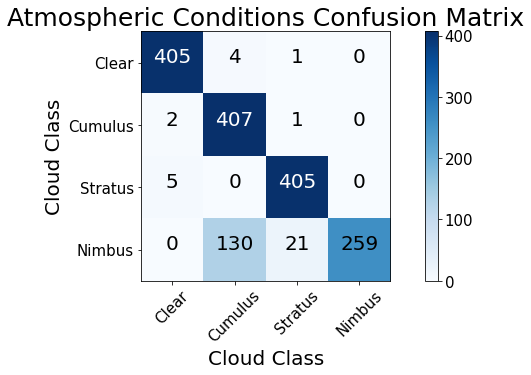

In [22]:
plt.figure(figsize = (10, 5))
plt.imshow(C_, cmap = 'Blues')
plt.colorbar().ax.tick_params(labelsize = 15)
plt.title('Atmospheric Conditions Confusion Matrix', fontsize = 25)
   
names_ = ['Clear', 'Cumulus', 'Stratus', 'Nimbus']
marks_ = np.arange(len(names_))
plt.xticks(marks_, names_, rotation = 45, fontsize = 15)
plt.yticks(marks_, names_, fontsize = 15)
plt.tight_layout()

tau = 350
for i in range(C_.shape[0]):
    for j in range(C_.shape[1]):
        if C_[i, j] > tau:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "white", fontsize = 20)
        else:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "black", fontsize = 20)

plt.ylabel('Cloud Class', fontsize = 20)
plt.xlabel('Cloud Class', fontsize = 20)
plt.show()

# Dataset v7
Lucas-Kanade options: $\mathcal{W} = 16$, $\tau = 0$, $\sigma = 1$.

In [23]:
# 0.6570731707317072 1000.0 1 0.875609756097561
# [[368  22  20   0], [  0 410   0   0], [ 12   0 398   0], [  0 129  21 260]]
# 0.7158536585365854 1000.0 2 0.7969512195121952
# [[269 141   0   0], [ 31 369  10   0], [  0   2 408   0], [  0 132  17 261]]
# 0.6945121951219513 0.0031622776601683794 3 0.776829268292683
# [[260 148   0   2], [  0 389  18   3], [  0   3 365  42], [  0 134  16 260]]
# 0.6779268292682927 10.0 4 0.7969512195121952
# [[260 149   0   1], [  0 402   8   0], [  0   0 384  26], [  0 133  16 261]]
# 0.6736585365853658 0.001 5 0.8121951219512196
# [[260 149   0   1], [  0 401   6   3], [  0   0 410   0], [  0 134  15 261]]
x_3_ = np.array([0.8756097560975, 0.79695121951219, 0.7768292682926, 
                 0.79695121951219, 0.81219512195121])[..., np.newaxis]

# 0.7167073170731706 31.622776601683793 1 0.8896341463414634
# [[394   8   8   0], [ 11 399   0   0], [  4   0 406   0], [  0 131  19 260]]
# 0.7236585365853658 0.03162277660168379 2 0.824390243902439
# [[279 131   0   0], [  4 404   2   0], [  0   1 409   0], [  0 132  18 260]]
# 0.7047560975609757 31.622776601683793 3 0.8
# [[273 135   0   2], [  3 403   4   0], [  0   1 375  34], [  0 134  15 261]]
# 0.7014634146341463 10.0 4 0.8079268292682927
# [[260 149   0   1], [  9 401   0   0], [  0   2 404   4], [  0 135  15 260]]
# 0.6978048780487806 0.03162277660168379 5 0.8079268292682927
# [[260 149   0   1], [ 10 396   1   3], [  0   1 409   0], [  0 135  15 260]]
x_4_ = np.array([0.889634146341463, 0.824390243902439, 0.8, 
                 0.8079268292682927, 0.8079268292682927])[..., np.newaxis]

# 0.6765853658536586 0.01 1 0.7304878048780488
# [[241   9 160   0], [ 16 394   0   0], [110   0 300   0], [  0 133  14 263]]
# 0.7 100.0 2 0.75
# [[290 119   1   0], [133 274   3   0], [  3   0 407   0], [  1 133  17 259]]
# 0.687560975609756 100.0 3 0.7621951219512195
# [[275 111  15   9], [ 66 333  10   1], [  0   0 383  27], [  0 135  16 259]]
# 0.6474390243902439 31.622776601683793 4 0.7621951219512195
# [[262 103  43   2], [ 77 324   5   4], [  3   0 406   1], [  0 135  17 258]]
# 0.6340243902439024 0.03162277660168379 5 0.7707317073170732
# [[275 101  32   2], [ 69 327   7   7], [  6   0 404   0], [  0 137  15 258]]
x_2_ = np.array([0.7304878048780488, 0.75, 0.7621951219512195, 
                 0.7621951219512195, 0.7707317073170732])[..., np.newaxis]

# 0.6417073170731706 0.001 1 0.6573170731707317
# [[190  18 202   0], [  0 410   0   0], [195   0 215   0], [  0 134  13 263]]
# 0.63 0.31622776601683794 2 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  21 259]]
# 0.6526829268292683 0.03162277660168379 3 0.8115853658536586
# [[261 149   0   0], [  0 410   0   0], [  0   0 401   9], [  0 136  15 259]]
# 0.6437804878048781 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  1   0 409   0], [  0 136  15 259]]
# 0.6240243902439023 0.0031622776601683794 5 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  2   0 408   0], [  0 136  14 260]]
x_1_ = np.array([0.65731707317073, 0.81707317073170, 0.81158536585365, 
                 0.81646341463414, 0.81646341463414])[..., np.newaxis]

# Ait Temp, Dew Point, pressure, humidity, elevation, azimuth, CSI, GSI, pyranometer, wind angle, wind magnitude
# Preassure, CSI, pyranometer
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1) * 100.
y_ = np.array([0.8756097560975, 0.889634146341463, 0.7707317073170732, 0.81707317073170]) * 100.

# [[394   8   8   0], [ 11 399   0   0], [  4   0 406   0], [  0 131  19 260]]
C_ = np.array([[394, 8, 8, 0], [11, 399, 0, 0], [4, 0, 406, 0], [0, 131, 19, 260]])

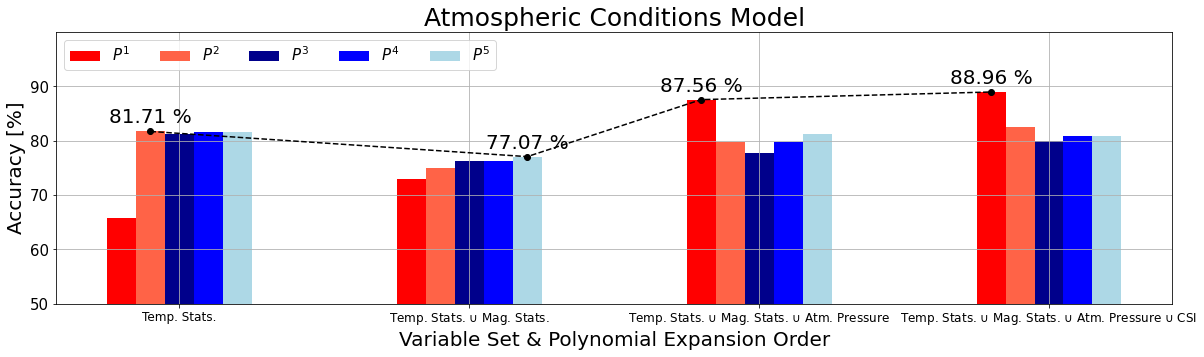

In [24]:
width     = 0.2
model_    = np.arange(0, 8, 2)
y_max_    = np.max(x_, axis = 0)
y_argmax_ = np.argmax(x_, axis = 0)
z_        = [-0.2, 2.4, 3.6, 5.6]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'$P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'$P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'$P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'$P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'$P^5$', color = 'lightblue')

plt.plot(z_, y_max_, '--o', color = 'black')

for x, y, y_max in zip(z_, y_, y_max_):
    #plt.text(x, y + 1, r'{} %'.format(np.around(y, decimals = 2)), ha = "center", fontsize = 15)
    plt.text(x, y_max + 1.5, r'{} %'.format(np.around(y_max, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper left', ncol = 7, fontsize = 15)
plt.ylim((50, 100))
plt.xticks(np.arange(0., 8., 2.), [r'Temp. Stats.', r'Temp. Stats. $\cup$ Mag. Stats.', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ Atm. Pressure', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ Atm. Pressure $\cup$ CSI'], fontsize = 12)
plt.yticks(np.arange(50., 100, 10.), fontsize = 15)
plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'Accuracy [%]', fontsize = 20)
plt.title(r'Atmospheric Conditions Model', fontsize = 25)
plt.grid()
plt.show()

In [25]:
# [] [] [] [] [0, 1, 2, 3]
# 0.43085365853658536 1.0 1 0.43902439024390244
# [[344  25  28  13], [276  49  79   6], [135  30 166  79], [106  74  69 161]]
# 0.4901219512195122 0.03162277660168379 2, 0.38902439024390245
# [[323  30  47  10], [259  38  92  21], [ 91  79 208  32] [ 95 165  81  69]]
# 0.482439024390244 10.0 3 0.35060975609756095
# [[153   1 255   1], [ 68   8 329   5], [  5   1 403   1], [ 23  37 339  11]]
# 0.3901219512195122 1000.0 4 0.29024390243902437
# [[ 47 359   0   4], [  2 404   0   4], [  0 393   0  17], [  6 379   0  25]]
# 0.2854878048780488 316.22776601683796 5 0.24390243902439024
# [[ 10 350   0  50], [ 36 339   0  35], [  2 357   0  51] [ 29 330   0  51]]
x_1_ = np.array([0.43902439024390244, 0.38902439024390245, 0.35060975609756095, 
                 0.29024390243902437, 0.24390243902439024])[..., np.newaxis]

# 0.6765853658536586 0.01 1 0.7304878048780488
# [[241   9 160   0], [ 16 394   0   0], [110   0 300   0], [  0 133  14 263]]
# 0.7 100.0 2 0.75
# [[290 119   1   0], [133 274   3   0], [  3   0 407   0], [  1 133  17 259]]
# 0.687560975609756 100.0 3 0.7621951219512195
# [[275 111  15   9], [ 66 333  10   1], [  0   0 383  27], [  0 135  16 259]]
# 0.6474390243902439 31.622776601683793 4 0.7621951219512195
# [[262 103  43   2], [ 77 324   5   4], [  3   0 406   1], [  0 135  17 258]]
# 0.6340243902439024 0.03162277660168379 5 0.7707317073170732
# [[275 101  32   2], [ 69 327   7   7], [  6   0 404   0], [  0 137  15 258]]
x_2_ = np.array([0.7304878048780488, 0.75, 0.7621951219512195, 
                 0.7621951219512195, 0.7707317073170732])[..., np.newaxis]

# 0.6570731707317072 1000.0 1 0.875609756097561
# [[368  22  20   0], [  0 410   0   0], [ 12   0 398   0], [  0 129  21 260]]
# 0.7158536585365854 1000.0 2 0.7969512195121952
# [[269 141   0   0], [ 31 369  10   0], [  0   2 408   0], [  0 132  17 261]]
# 0.6945121951219513 0.0031622776601683794 3 0.776829268292683
# [[260 148   0   2], [  0 389  18   3], [  0   3 365  42], [  0 134  16 260]]
# 0.6779268292682927 10.0 4 0.7969512195121952
# [[260 149   0   1], [  0 402   8   0], [  0   0 384  26], [  0 133  16 261]]
# 0.6736585365853658 0.001 5 0.8121951219512196
# [[260 149   0   1], [  0 401   6   3], [  0   0 410   0], [  0 134  15 261]]
x_3_ = np.array([0.8756097560975, 0.79695121951219, 0.7768292682926, 
                 0.79695121951219, 0.81219512195121])[..., np.newaxis]

# 0.7167073170731706 31.622776601683793 1 0.8896341463414634
# [[394   8   8   0], [ 11 399   0   0], [  4   0 406   0], [  0 131  19 260]]
# 0.7236585365853658 0.03162277660168379 2 0.824390243902439
# [[279 131   0   0], [  4 404   2   0], [  0   1 409   0], [  0 132  18 260]]
# 0.7047560975609757 31.622776601683793 3 0.8
# [[273 135   0   2], [  3 403   4   0], [  0   1 375  34], [  0 134  15 261]]
# 0.7014634146341463 10.0 4 0.8079268292682927
# [[260 149   0   1], [  9 401   0   0], [  0   2 404   4], [  0 135  15 260]]
# 0.6978048780487806 0.03162277660168379 5 0.8079268292682927
# [[260 149   0   1], [ 10 396   1   3], [  0   1 409   0], [  0 135  15 260]]
x_4_ = np.array([0.889634146341463, 0.824390243902439, 0.8, 
                 0.8079268292682927, 0.8079268292682927])[..., np.newaxis]

# Ait Temp, Dew Point, pressure, humidity, elevation, azimuth, CSI, GSI, pyranometer, wind angle, wind magnitude
# Preassure, CSI, pyranometer
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1) * 100.
y_ = np.array([0.9, 0.89451219512195, 0.87987804878048, 0.81707317073170]) * 100.

# [[394   8   8   0], [ 11 399   0   0], [  4   0 406   0], [  0 131  19 260]]
C_ = np.array([[394, 8, 8, 0], [11, 399, 0, 0], [4, 0, 406, 0], [0, 131, 19, 260]])

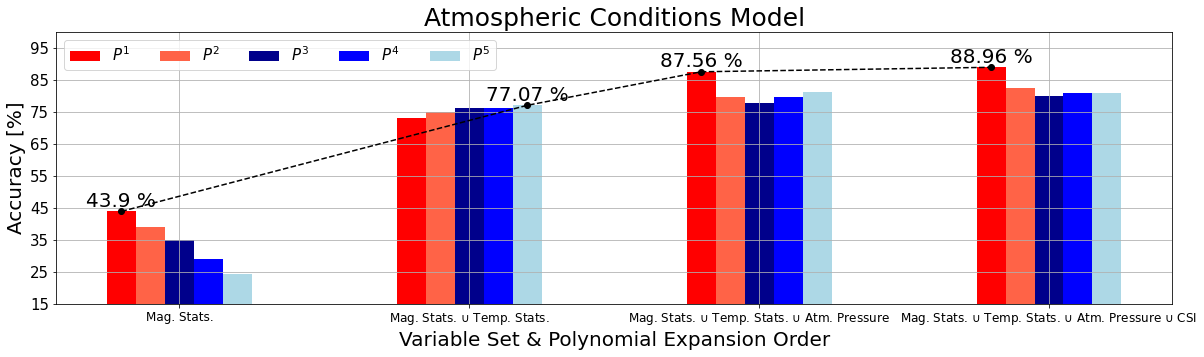

In [26]:
width     = 0.2
model_    = np.arange(0, 8, 2)
y_max_    = np.max(x_, axis = 0)
y_argmax_ = np.argmax(x_, axis = 0)
z_        = [-0.4, 2.4, 3.6, 5.6]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'$P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'$P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'$P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'$P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'$P^5$', color = 'lightblue')

plt.plot(z_, y_max_, '--o', color = 'black')

for x, y, y_max in zip(z_, y_, y_max_):
    #plt.text(x, y + 1, r'{} %'.format(np.around(y, decimals = 2)), ha = "center", fontsize = 15)
    plt.text(x, y_max + 1.5, r'{} %'.format(np.around(y_max, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper left', ncol = 7, fontsize = 15)
plt.ylim((15, 100))
plt.xticks(np.arange(0., 8., 2.), [r'Mag. Stats.', r'Mag. Stats. $\cup$ Temp. Stats.', 
           r'Mag. Stats. $\cup$ Temp. Stats. $\cup$ Atm. Pressure', 
           r'Mag. Stats. $\cup$ Temp. Stats. $\cup$ Atm. Pressure $\cup$ CSI'], fontsize = 12)
plt.yticks(np.arange(15, 100, 10.), fontsize = 15)
plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'Accuracy [%]', fontsize = 20)
plt.title(r'Atmospheric Conditions Model', fontsize = 25)
plt.grid()
plt.show()

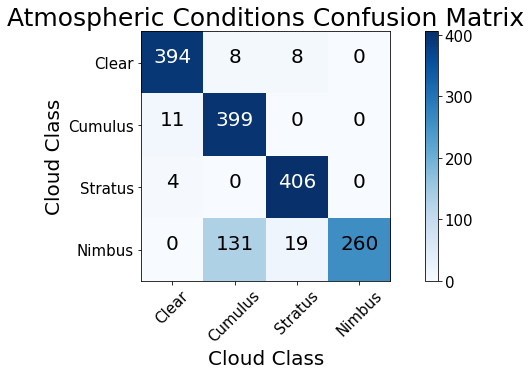

In [27]:
plt.figure(figsize = (10, 5))
plt.imshow(C_, cmap = 'Blues')
plt.colorbar().ax.tick_params(labelsize = 15)
plt.title('Atmospheric Conditions Confusion Matrix', fontsize = 25)
   
names_ = ['Clear', 'Cumulus', 'Stratus', 'Nimbus']
marks_ = np.arange(len(names_))
plt.xticks(marks_, names_, rotation = 45, fontsize = 15)
plt.yticks(marks_, names_, fontsize = 15)
plt.tight_layout()

tau = 350
for i in range(C_.shape[0]):
    for j in range(C_.shape[1]):
        if C_[i, j] > tau:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "white", fontsize = 20)
        else:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "black", fontsize = 20)

plt.ylabel('Cloud Class', fontsize = 20)
plt.xlabel('Cloud Class', fontsize = 20)
plt.show()

# Dataset v8
Lucas-Kanade options: $\mathcal{W} = 9$, $\tau = 5.21506878 \times 10^{-3}$, $\sigma = 1.01125549$.

In [28]:
# 0.6417073170731706 0.001 1 0.6573170731707317
# [[190  18 202   0], [  0 410   0   0], [195   0 215   0], [  0 134  13 263]]
# 0.63 0.31622776601683794 2 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  21 259]]
# 0.6526829268292683 0.03162277660168379 3 0.8115853658536586
# [[261 149   0   0], [  0 410   0   0], [  0   0 401   9], [  0 136  15 259]]
# 0.6437804878048781 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  1   0 409   0], [  0 136  15 259]]
# 0.6240243902439023 0.0031622776601683794 5 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  2   0 408   0], [  0 136  14 260]]
x_1_ = np.array([0.6573170731707317, 0.8170731707317073, 0.8115853658536586, 
                 0.8164634146341463, 0.8164634146341463])[..., np.newaxis]

# 0.7117073170731707 316.22776601683796 1 0.8628048780487805
# [[408   1   1   0], [ 38 372   0   0], [ 30   0 380   0], [  0 137  18 255]]
# 0.705609756097561 10.0 2 0.7554878048780488
# [[280  85  44   1], [112 292   6   0], [  3   0 407   0], [  1 133  16 260]]
# 0.7028048780487804 0.03162277660168379 3 0.7621951219512195
# [[260  65  82   3], [ 44 342  17   7], [  0   0 392  18], [  0 139  15 256]]
# 0.6782926829268293 31.622776601683793 4 0.7615853658536585
# [[263  93  53   1], [ 70 330   7   3], [  8   0 402   0], [  0 140  16 254]]
# 0.6547560975609757 0.001 5 0.7774390243902439
# [[268  81  60   1], [ 42 356   5   7], [ 15   0 395   0], [  0 141  13 256]]
x_2_ = np.array([0.8628048780487805, 0.7554878048780488, 0.7621951219512195, 
                 0.7615853658536585, 0.7774390243902439])[..., np.newaxis]

# 0.7486585365853659 10.0 1 0.8878048780487805
# [[408   1   1   0], [ 27 383   0   0], [  0   0 410   0], [  0 138  17 255]]
# 0.7526829268292684 100.0 2 0.8286585365853658
# [[286 123   0   1], [  1 407   2   0], [  0   0 410   0], [  0 137  17 256]]
# 0.7190243902439024 0.001 3 0.7908536585365854
# [[273 137   0   0], [  2 404   3   1], [  0   0 364  46], [  0 140  14 256]]
# 0.7328048780487804 1000.0 4 0.8128048780487804
# [[261 143   1   5], [  0 407   2   1], [  0   0 410   0], [  0 141  14 255]]
# 0.7404878048780488 1.0 2 0.8115853658536586
# [[287 120   0   3], [ 27 376   7   0], [  0   0 410   0], [  0 136  16 258]]
x_3_ = np.array([0.8878048780487805, 0.8286585365853658, 0.7908536585365854, 
                 0.8128048780487804, 0.8115853658536586])[..., np.newaxis]

# 0.7229268292682927 100.0 2 0.774390243902439
# [[261 133  16   0], [ 43 342  25   0], [  0   0 410   0], [  0 135  18 257]]
# 0.735609756097561 0.001 2 0.775609756097561
# [[272 132   6   0], [ 57 333  20   0], [  0   0 410   0], [  0 135  18 257]]
# 0.7053658536585367 10.0 3 0.7676829268292683
# [[284 119   0   7], [ 26 355  25   4], [  0   0 363  47], [  0 138  15 257]]
# 0.7260975609756098 0.1 4 0.7835365853658537
# [[261 118   1  30], [ 23 364  22   1], [  0   0 405   5], [  0 141  14 255]]
# 0.725 10.0 5 0.7859756097560976
# [[261 147   2   0], [ 22 362  19   7], [  0   0 410   0], [  0 140  14 256]]
x_4_ = np.array([0.774390243902439, 0.775609756097561, 0.7676829268292683, 
                 0.7835365853658537, 0.7859756097560976])[..., np.newaxis]

# Ait Temp, Dew Point, pressure, humidity, elevation, azimuth, CSI, GSI, pyranometer, wind angle, wind magnitude
# Preassure, CSI, pyranometer
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1) * 100.
y_ = np.array([0.8170731707317073, 0.8628048780487805, 0.7859756097560976, 0.8878048780487805]) * 100.

# [[408   1   1   0], [ 27 383   0   0], [  0   0 410   0], [  0 138  17 255]]
C_ = np.array([[408, 1, 1, 0], [27, 383, 0, 0], [0, 0, 410, 0], [0, 138, 17, 255]])

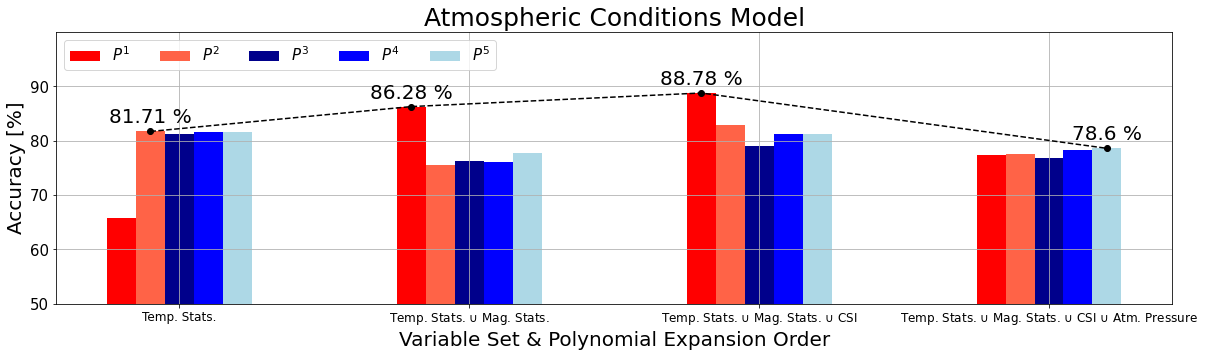

In [29]:
width     = 0.2
model_    = np.arange(0, 8, 2)
y_max_    = np.max(x_, axis = 0)
y_argmax_ = np.argmax(x_, axis = 0)
z_        = [-0.2, 1.6, 3.6, 6.4]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'$P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'$P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'$P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'$P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'$P^5$', color = 'lightblue')

plt.plot(z_, y_max_, '--o', color = 'black')

for x, y, y_max in zip(z_, y_, y_max_):
    #plt.text(x, y + 1, r'{} %'.format(np.around(y, decimals = 2)), ha = "center", fontsize = 15)
    plt.text(x, y_max + 1.5, r'{} %'.format(np.around(y_max, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper left', ncol = 7, fontsize = 15)
plt.ylim((50, 100))
plt.xticks(np.arange(0., 8., 2.), [r'Temp. Stats.', r'Temp. Stats. $\cup$ Mag. Stats.', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ CSI', 
           r'Temp. Stats. $\cup$ Mag. Stats. $\cup$ CSI $\cup$ Atm. Pressure'], fontsize = 12)
plt.yticks(np.arange(50., 100, 10.), fontsize = 15)
plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'Accuracy [%]', fontsize = 20)
plt.title(r'Atmospheric Conditions Model', fontsize = 25)
plt.grid()
plt.show()

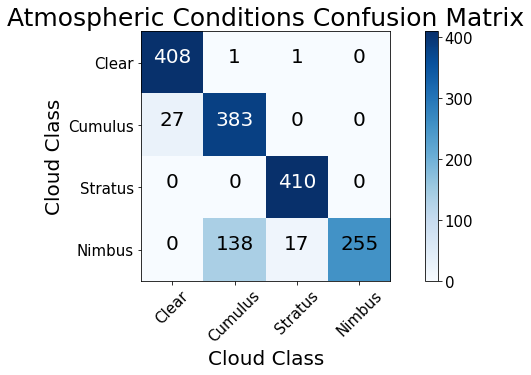

In [30]:
plt.figure(figsize = (10, 5))
plt.imshow(C_, cmap = 'Blues')
plt.colorbar().ax.tick_params(labelsize = 15)
plt.title('Atmospheric Conditions Confusion Matrix', fontsize = 25)
   
names_ = ['Clear', 'Cumulus', 'Stratus', 'Nimbus']
marks_ = np.arange(len(names_))
plt.xticks(marks_, names_, rotation = 45, fontsize = 15)
plt.yticks(marks_, names_, fontsize = 15)
plt.tight_layout()

tau = 350
for i in range(C_.shape[0]):
    for j in range(C_.shape[1]):
        if C_[i, j] > tau:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "white", fontsize = 20)
        else:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "black", fontsize = 20)

plt.ylabel('Cloud Class', fontsize = 20)
plt.xlabel('Cloud Class', fontsize = 20)
plt.show()

In [31]:
# V8 [2] [0, 1, 2, 3] [] [] []
# 0.6251219512195121 0.1 1 0.8591463414634146
# [[342  66   2   0], [  0 410   0   0], [ 14   0 396   0], [  0 131  18 261]]
# 0.6580487804878048 10.0 2 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 133  17 260]]
# 0.6342682926829268 0.31622776601683794 3 0.8091463414634147
# [[261 149   0   0], [  0 410   0   0], [  0   0 395  15], [  0 135  14 261]]
# 0.621219512195122 0.0031622776601683794 4 0.8097560975609757
# [[261 149   0   0], [  0 397  13   0], [  0   0 410   0], [  0 134  16 260]]
# 0.6097560975609756 1000.0 5 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 135  15 260]]

# V8 [2, 6] [0, 1, 2, 3] [] [] []
# 0.6629268292682926 1.0 1 0.876219512195122
# [[366  39   5   0], [  4 406   0   0], [  5   0 405   0], [  0 130  20 260]]
# 0.6886585365853659 0.0031622776601683794 2 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  20 260]]
# 0.6521951219512195 100.0 3 0.8067073170731708
# [[261 149   0   0], [  6 404   0   0], [  0   0 397  13], [  0 135  14 261]]
# 0.6310975609756098 1.0 4 0.8121951219512196
# [[261 149   0   0], [  9 401   0   0], [  0   0 410   0], [  0 135  15 260]]
# 0.6240243902439024 1.0 5 0.8097560975609757
# [[261 149   0   0], [ 13 397   0   0], [  0   0 410   0], [  0 135  15 260]]

# [6] [0, 1, 2, 3] [] [] []
# 0.6509756097560976 3.1622776601683795 1 0.8939024390243903
# [[402   0   8   0], [  6 404   0   0], [  9   0 401   0], [  0 132  19 259]]
# 0.6787804878048781 0.03162277660168379 2 0.8347560975609756
# [[297 113   0   0], [  8 402   0   0], [  0   0 410   0], [  0 130  20 260]]
# 0.6779268292682927 3.1622776601683795 3 0.8146341463414634
# [[272 138   0   0], [  2 408   0   0], [  0   0 397  13], [  0 137  14 259]]
# 0.6623170731707317 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  2 408   0   0], [  0   0 410   0], [  0 136  14 260]]
# 0.6341463414634146 0.0031622776601683794 5 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 137  14 259]]

# [6] [0, 1, 2, 3] [] [] [0, 1, 2, 3]
# 0.7604878048780488 1000.0 1 0.8804878048780488
# [[408   1   0   1], [ 33 377   0   0], [  5   0 405   0], [  0 138  18 254]]
# 0.7230487804878049 0.31622776601683794 2 0.8189024390243902
# [[319  91   0   0], [ 47 355   8   0], [  0   0 410   0], [  0 135  16 259]]
# 0.708048780487805 1.0 3 0.7621951219512195
# [[264  77  67   2], [ 38 367   0   5], [  0   0 361  49], [  0 139  13 258]]
# 0.6914634146341464 0.31622776601683794 4 0.776219512195122
# [[269  77  63   1], [ 62 342   0   6], [  3   0 407   0], [  0 141  14 255]]
# 0.6819512195121952 0.31622776601683794 5 0.7859756097560976
# [[280  96  34   0], [ 57 346   0   7], [  3   0 407   0], [  0 141  13 256]]

In [32]:
# [] [0, 1, 2, 3] [] [] []
# 0.6417073170731706 0.001 1 0.6573170731707317
# [[190  18 202   0], [  0 410   0   0], [195   0 215   0], [  0 134  13 263]]
# 0.63 0.31622776601683794 2 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  21 259]]
# 0.6526829268292683 0.03162277660168379 3 0.8115853658536586
# [[261 149   0   0], [  0 410   0   0], [  0   0 401   9], [  0 136  15 259]]
# 0.6437804878048781 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  1   0 409   0], [  0 136  15 259]]
# 0.6240243902439023 0.0031622776601683794 5 0.8164634146341463
# [[261 149   0   0], [  0 410   0   0], [  2   0 408   0], [  0 136  14 260]]
x_1_ = np.array([0.6573170731707317, 0.8170731707317073, 0.8115853658536586, 
                 0.8164634146341463, 0.8164634146341463])[..., np.newaxis]

# [6] [0, 1, 2, 3] [] [] []
# 0.6509756097560976 3.1622776601683795 1 0.8939024390243903
# [[402   0   8   0], [  6 404   0   0], [  9   0 401   0], [  0 132  19 259]]
# 0.6787804878048781 0.03162277660168379 2 0.8347560975609756
# [[297 113   0   0], [  8 402   0   0], [  0   0 410   0], [  0 130  20 260]]
# 0.6779268292682927 3.1622776601683795 3 0.8146341463414634
# [[272 138   0   0], [  2 408   0   0], [  0   0 397  13], [  0 137  14 259]]
# 0.6623170731707317 316.22776601683796 4 0.8164634146341463
# [[261 149   0   0], [  2 408   0   0], [  0   0 410   0], [  0 136  14 260]]
# 0.6341463414634146 0.0031622776601683794 5 0.8170731707317073
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 137  14 259]]
x_2_ = np.array([0.8939024390243903, 0.8347560975609756, 0.8115853658536586, 
                 0.8164634146341463, 0.8164634146341463])[..., np.newaxis]

# [2] [0, 1, 2, 3] [] [] []
# 0.6251219512195121 0.1 1 0.8591463414634146
# [[342  66   2   0], [  0 410   0   0], [ 14   0 396   0], [  0 131  18 261]]
# 0.6580487804878048 10.0 2 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 133  17 260]]
# 0.6342682926829268 0.31622776601683794 3 0.8091463414634147
# [[261 149   0   0], [  0 410   0   0], [  0   0 395  15], [  0 135  14 261]]
# 0.621219512195122 0.0031622776601683794 4 0.8097560975609757
# [[261 149   0   0], [  0 397  13   0], [  0   0 410   0], [  0 134  16 260]]
# 0.6097560975609756 1000.0 5 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 135  15 260]]
x_3_ = np.array([0.8591463414634146, 0.8176829268292682, 0.8091463414634147, 
                 0.8097560975609757, 0.8176829268292682])[..., np.newaxis]

# V8 [2, 6] [0, 1, 2, 3] [] [] []
# 0.6629268292682926 1.0 1 0.876219512195122
# [[366  39   5   0], [  4 406   0   0], [  5   0 405   0], [  0 130  20 260]]
# 0.6886585365853659 0.0031622776601683794 2 0.8176829268292682
# [[261 149   0   0], [  0 410   0   0], [  0   0 410   0], [  0 130  20 260]]
# 0.6521951219512195 100.0 3 0.8067073170731708
# [[261 149   0   0], [  6 404   0   0], [  0   0 397  13], [  0 135  14 261]]
# 0.6310975609756098 1.0 4 0.8121951219512196
# [[261 149   0   0], [  9 401   0   0], [  0   0 410   0], [  0 135  15 260]]
# 0.6240243902439024 1.0 5 0.8097560975609757
# [[261 149   0   0], [ 13 397   0   0], [  0   0 410   0], [  0 135  15 260]]
x_4_ = np.array([0.876219512195122, 0.8176829268292682, 0.8067073170731708, 
                 0.8121951219512196, 0.8097560975609757])[..., np.newaxis]

# [6] [0, 1, 2, 3] [] [] [0, 1, 2, 3]
# 0.7604878048780488 1000.0 1 0.8804878048780488
# [[408   1   0   1], [ 33 377   0   0], [  5   0 405   0], [  0 138  18 254]]
# 0.7230487804878049 0.31622776601683794 2 0.8189024390243902
# [[319  91   0   0], [ 47 355   8   0], [  0   0 410   0], [  0 135  16 259]]
# 0.708048780487805 1.0 3 0.7621951219512195
# [[264  77  67   2], [ 38 367   0   5], [  0   0 361  49], [  0 139  13 258]]
# 0.6914634146341464 0.31622776601683794 4 0.776219512195122
# [[269  77  63   1], [ 62 342   0   6], [  3   0 407   0], [  0 141  14 255]]
# 0.6819512195121952 0.31622776601683794 5 0.7859756097560976
# [[280  96  34   0], [ 57 346   0   7], [  3   0 407   0], [  0 141  13 256]]
x_5_ = np.array([0.8804878048780488, 0.8189024390243902, 0.7621951219512195, 
                 0.776219512195122, 0.7859756097560976])[..., np.newaxis]

# [2] [0, 1, 2, 3] [] [] [0, 1, 2, 3]
# 0.7229268292682927 100.0 2 0.774390243902439
# [[261 133  16   0], [ 43 342  25   0], [  0   0 410   0], [  0 135  18 257]]
# 0.735609756097561 0.001 2 0.775609756097561
# [[272 132   6   0], [ 57 333  20   0], [  0   0 410   0], [  0 135  18 257]]
# 0.7053658536585367 10.0 3 0.7676829268292683
# [[284 119   0   7], [ 26 355  25   4], [  0   0 363  47], [  0 138  15 257]]
# 0.7260975609756098 0.1 4 0.7835365853658537
# [[261 118   1  30], [ 23 364  22   1], [  0   0 405   5], [  0 141  14 255]]
# 0.725 10.0 5 0.7859756097560976
# [[261 147   2   0], [ 22 362  19   7], [  0   0 410   0], [  0 140  14 256]]
x_6_ = np.array([0.774390243902439, 0.775609756097561, 0.7676829268292683, 
                 0.7835365853658537, 0.7859756097560976])[..., np.newaxis]

# [2, 6] [0, 1, 2, 3] [] [] [0, 1, 2, 3]
# 0.7486585365853659 10.0 1 0.8878048780487805
# [[408   1   1   0], [ 27 383   0   0], [  0   0 410   0], [  0 138  17 255]]
# 0.7526829268292684 100.0 2 0.8286585365853658
# [[286 123   0   1], [  1 407   2   0], [  0   0 410   0], [  0 137  17 256]]
# 0.7190243902439024 0.001 3 0.7908536585365854
# [[273 137   0   0], [  2 404   3   1], [  0   0 364  46], [  0 140  14 256]]
# 0.7328048780487804 1000.0 4 0.8128048780487804
# [[261 143   1   5], [  0 407   2   1], [  0   0 410   0], [  0 141  14 255]]
# 0.7404878048780488 1.0 2 0.8115853658536586
# [[287 120   0   3], [ 27 376   7   0], [  0   0 410   0], [  0 136  16 258]]
x_7_ = np.array([0.8878048780487805, 0.8286585365853658, 0.7908536585365854, 
                 0.8128048780487804, 0.8115853658536586])[..., np.newaxis]

# Ait Temp, Dew Point, pressure, humidity, elevation, azimuth, CSI, GSI, pyranometer, wind angle, wind magnitude
# Preassure, CSI, pyranometer
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_, x_5_, x_6_, x_7_), axis = 1) * 100.
y_ = np.array([0.8170731707317073, 0.8939024390243903, 0.8591463414634146, 0.876219512195122,
               8804878048780488, 0.7859756097560976, 0.8878048780487805]) * 100.

# [[402   0   8   0], [  6 404   0   0], [  9   0 401   0], [  0 132  19 259]]
C_ = np.array([[402, 0, 8, 0], [6, 404, 0, 0], [9, 0, 401, 0], [0, 132, 19, 259]])
R_ = np.around(100.*C_.astype('float') / C_.sum(axis = 1)[:, np.newaxis], decimals = 2)
print(R_)
P_ = np.around(100.*C_.astype('float') / C_.sum(axis = 0)[:, np.newaxis], decimals = 2)
print(P_)
J_ = R_ + P_ - 100.
print(J_)

[[98.05  0.    1.95  0.  ]
 [ 1.46 98.54  0.    0.  ]
 [ 2.2   0.   97.8   0.  ]
 [ 0.   32.2   4.63 63.17]]
[[ 96.4    0.     1.92   0.  ]
 [  1.12  75.37   0.     0.  ]
 [  2.1    0.    93.69   0.  ]
 [  0.    50.97   7.34 100.  ]]
[[  94.45 -100.    -96.13 -100.  ]
 [ -97.42   73.91 -100.   -100.  ]
 [ -95.7  -100.     91.49 -100.  ]
 [-100.    -16.83  -88.03   63.17]]


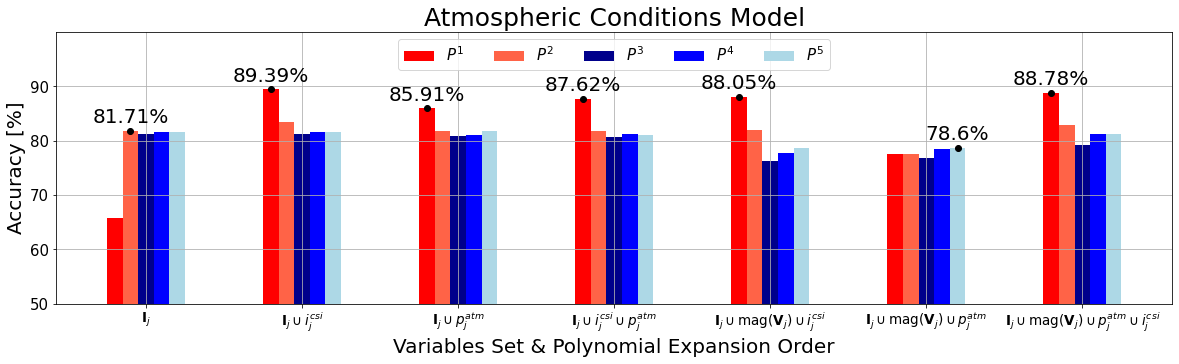

In [39]:
width     = 0.2
model_    = np.arange(0, 14, 2)
y_max_    = np.max(x_, axis = 0)
y_argmax_ = np.argmax(x_, axis = 0)
z_        = [-0.2, 1.6, 3.6, 5.6, 7.6, 10.4, 11.6]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'$P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'$P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'$P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'$P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'$P^5$', color = 'lightblue')

plt.plot(z_, y_max_, 'o', color = 'black')

for x, y, y_max in zip(z_, y_, y_max_):
    plt.text(x, y_max + 1.5, r'{}%'.format(np.around(y_max, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper center', ncol = 7, fontsize = 15)
plt.ylim((50, 100))
plt.xticks(np.arange(0., 14., 2.), 
           [r'$\mathbf{I}_j$', 
            r'$\mathbf{I}_j \cup i_j^{csi}$', 
            r'$\mathbf{I}_j \cup p^{atm}_j$',
            r'$\mathbf{I}_j \cup i_j^{csi} \cup p^{atm}_j$', 
            r'$\mathbf{I}_j \cup \mathrm{mag}(\mathbf{V}_j) \cup i_j^{csi}$',
            r'$\mathbf{I}_j \cup \mathrm{mag}(\mathbf{V}_j) \cup p^{atm}_j$',
            r'$\mathbf{I}_j \cup \mathrm{mag}(\mathbf{V}_j) \cup p^{atm}_j \cup i_j^{csi}$'], fontsize = 13.5)
plt.yticks(np.arange(50., 100, 10.), fontsize = 15)
plt.xlabel(r'Variables Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'Accuracy [%]', fontsize = 20)
plt.title(r'Atmospheric Conditions Model', fontsize = 25)
plt.grid()
plt.show()

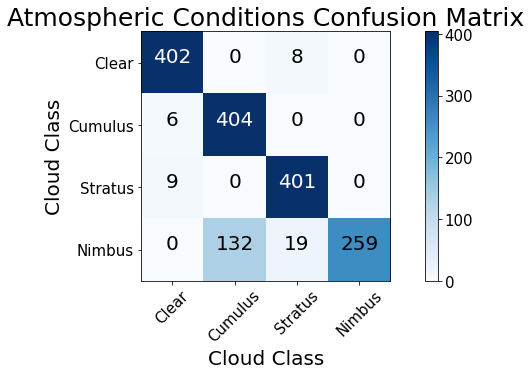

In [34]:
plt.figure(figsize = (10, 5))
plt.imshow(C_, cmap = 'Blues')
plt.colorbar().ax.tick_params(labelsize = 15)
plt.title('Atmospheric Conditions Confusion Matrix', fontsize = 25)
   
names_ = ['Clear', 'Cumulus', 'Stratus', 'Nimbus']
marks_ = np.arange(len(names_))
plt.xticks(marks_, names_, rotation = 45, fontsize = 15)
plt.yticks(marks_, names_, fontsize = 15)
plt.tight_layout()

tau = 350
for i in range(C_.shape[0]):
    for j in range(C_.shape[1]):
        if C_[i, j] > tau:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "white", fontsize = 20)
        else:
            plt.text(j, i, "{:,}".format(C_[i, j]), horizontalalignment = "center", 
                     color = "black", fontsize = 20)

plt.ylabel('Cloud Class', fontsize = 20)
plt.xlabel('Cloud Class', fontsize = 20)
plt.show()

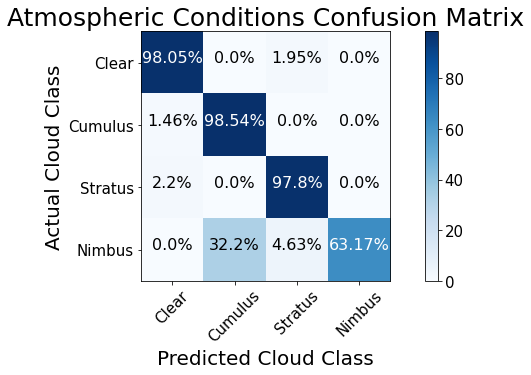

In [35]:
plt.figure(figsize = (10, 5))
plt.imshow(R_, cmap = 'Blues')
plt.colorbar().ax.tick_params(labelsize = 15)
plt.title('Atmospheric Conditions Confusion Matrix', fontsize = 25)
   
names_ = ['Clear', 'Cumulus', 'Stratus', 'Nimbus']
marks_ = np.arange(len(names_))
plt.xticks(marks_, names_, rotation = 45, fontsize = 15)
plt.yticks(marks_, names_, fontsize = 15)
plt.tight_layout()

tau = 50
for i in range(C_.shape[0]):
    for j in range(C_.shape[1]):
        if R_[i, j] > tau:
            plt.text(j, i, "{}%".format(R_[i, j]), horizontalalignment = "center", 
                     color = "white", fontsize = 16)
        else:
            plt.text(j, i, "{}%".format(R_[i, j]), horizontalalignment = "center", 
                     color = "black", fontsize = 16)

plt.ylabel('Actual Cloud Class', fontsize = 20)
plt.xlabel('Predicted Cloud Class', fontsize = 20)
plt.show()